In [3]:
from urllib.request import urlretrieve

urlretrieve('https://drive.google.com/uc?export=download&id=1XLVFI_sK0smRVVuT8XU2s-M3lJT-68sN', './open.zip')
!unzip ./open.zip

Archive:  ./open.zip
   creating: open/
  inflating: open/train.csv          
  inflating: open/sample_submission.csv  
  inflating: open/test.csv           


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

## 데이터 확인
### [데이터 변수 설명](https://www.dacon.io/competitions/official/235713/talkboard/402821/)
- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
  - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
  - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
  - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식
  - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일
  - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
  - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
  - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
  - 낮을 수록 높은 신용의 신용카드 사용자를 의미함



## My EDA

In [ ]:
train.info()  # occyp_type -> null data 갖는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
len(train['index'].unique())

26457

In [13]:
train['FLAG_MOBIL'].unique()

array([1])

In [14]:
test['FLAG_MOBIL'].unique()

array([1])

In [6]:
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

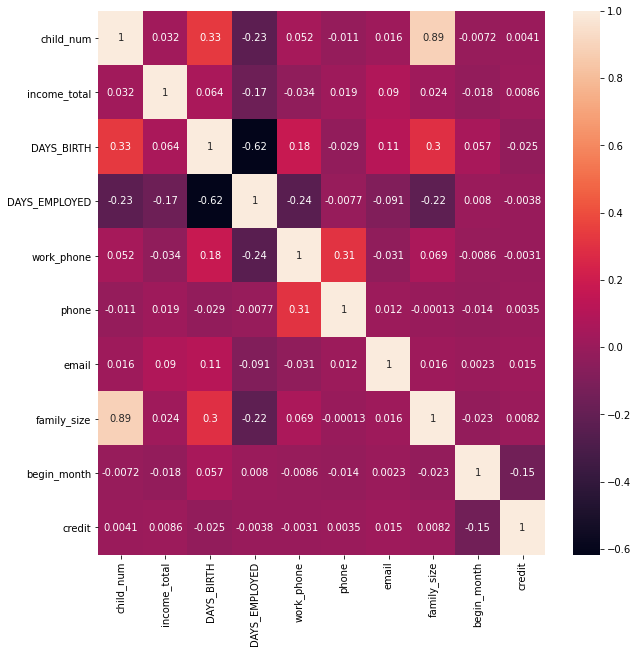

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True)

In [8]:
(train['family_size'] - train['child_num']).value_counts()

 2.0    20331
 1.0     6120
 0.0        5
-1.0        1
dtype: int64

In [9]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [14]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [13]:
for col in train.columns:
  print(f"#####{col}#####")
  print(train[col].value_counts())
  print()

#####gender#####
F    17697
M     8760
Name: gender, dtype: int64

#####car#####
N    16410
Y    10047
Name: car, dtype: int64

#####reality#####
Y    17830
N     8627
Name: reality, dtype: int64

#####child_num#####
0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

#####income_total#####
135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
177750.0       1
91530.0        1
87448.5        1
97731.0        1
204750.0       1
Name: income_total, Length: 249, dtype: int64

#####income_type#####
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

#####edu_type#####
Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academi

# [EDA for starters(가르침이필요해)](https://dacon.io/competitions/official/235713/codeshare/2485?page=1&dtype=vote)
> 일부 확인해볼 부분 실행해봄

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

In [ ]:
train_y = train['credit'].astype(int)

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'reality')

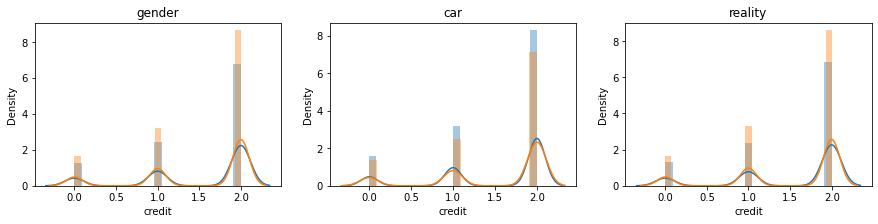

In [ ]:
# 위에가 하늘색... 아래가 주황색...

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.distplot(train_y[train['gender']=='M'], ax=axes[0])
sns.distplot(train_y[train['gender']=='F'], ax=axes[0])

sns.distplot(train_y[train['car']=='N'], ax=axes[1])
sns.distplot(train_y[train['car']=='Y'], ax=axes[1])

sns.distplot(train_y[train['reality']=='N'], ax=axes[2])
sns.distplot(train_y[train['reality']=='Y'], ax=axes[2])

axes[0].set_title('gender')
axes[1].set_title('car')
axes[2].set_title('reality')

# [데이터를 변환하고 이상치를 제거해보자 !!(함께하는우리)](https://dacon.io/competitions/official/235713/codeshare/2565?page=2&dtype=vote)
   - 상관관계 높은 데이터 drop (`child_num`, `family_size`)
   - `occyp_type`
     - `credit` 비율이 train 전체와 `occyp_type` 이 NaN의 비율이 비슷
     - NaN이라고 `DAYS_EMPLOYED` 값이 0 인 것은 아님. 즉, 직업이 없는 상태 아님

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

In [ ]:
columns = ['income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month']
train[columns].describe()

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
count,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000
mean,1.873065e+05,-15958.053899,59068.750728,2.196848,-26.123294
std,1.018784e+05,4201.589022,137475.427503,0.916717,16.559550
min,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000
25%,1.215000e+05,-19431.000000,-3153.000000,2.000000,-39.000000
50%,1.575000e+05,-15547.000000,-1539.000000,2.000000,-24.000000
75%,2.250000e+05,-12446.000000,-407.000000,3.000000,-12.000000
max,1.575000e+06,-7705.000000,365243.000000,20.000000,0.000000


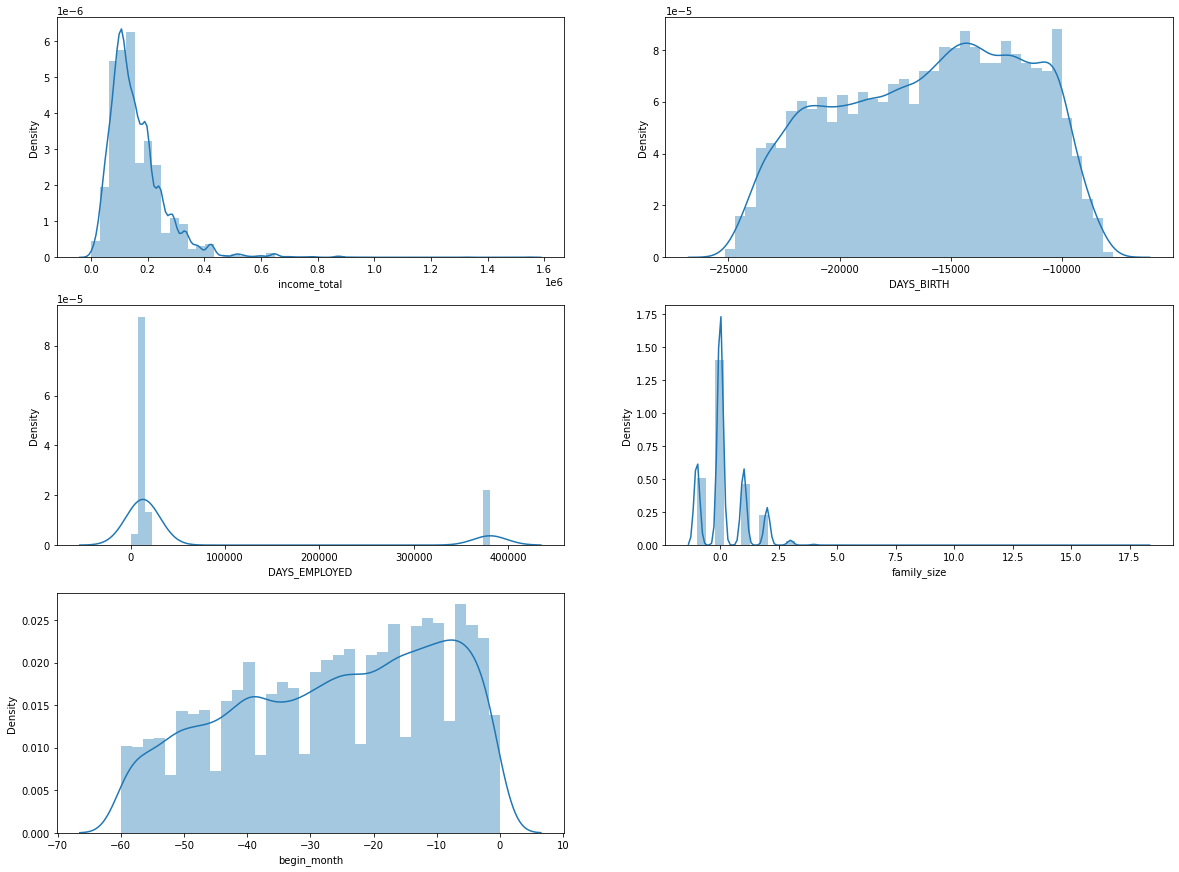

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.distplot(train[columns[i]])
plt.show()

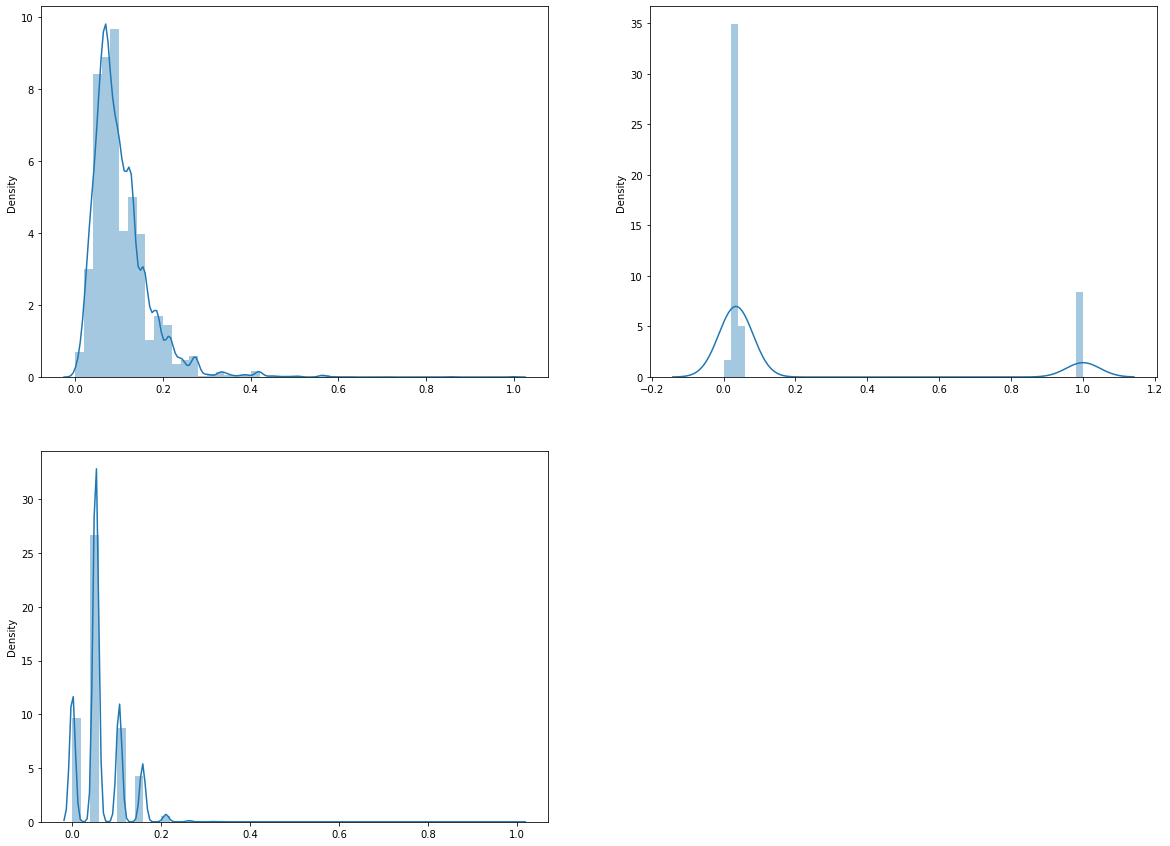

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize = (20,15))
candidate = ['income_total', 'DAYS_EMPLOYED', 'family_size']
for i in range(len(candidate)) :
    plt.subplot(2, 2,i+1)
    sns.distplot(MinMaxScaler().fit_transform(train[[candidate[i]]]))

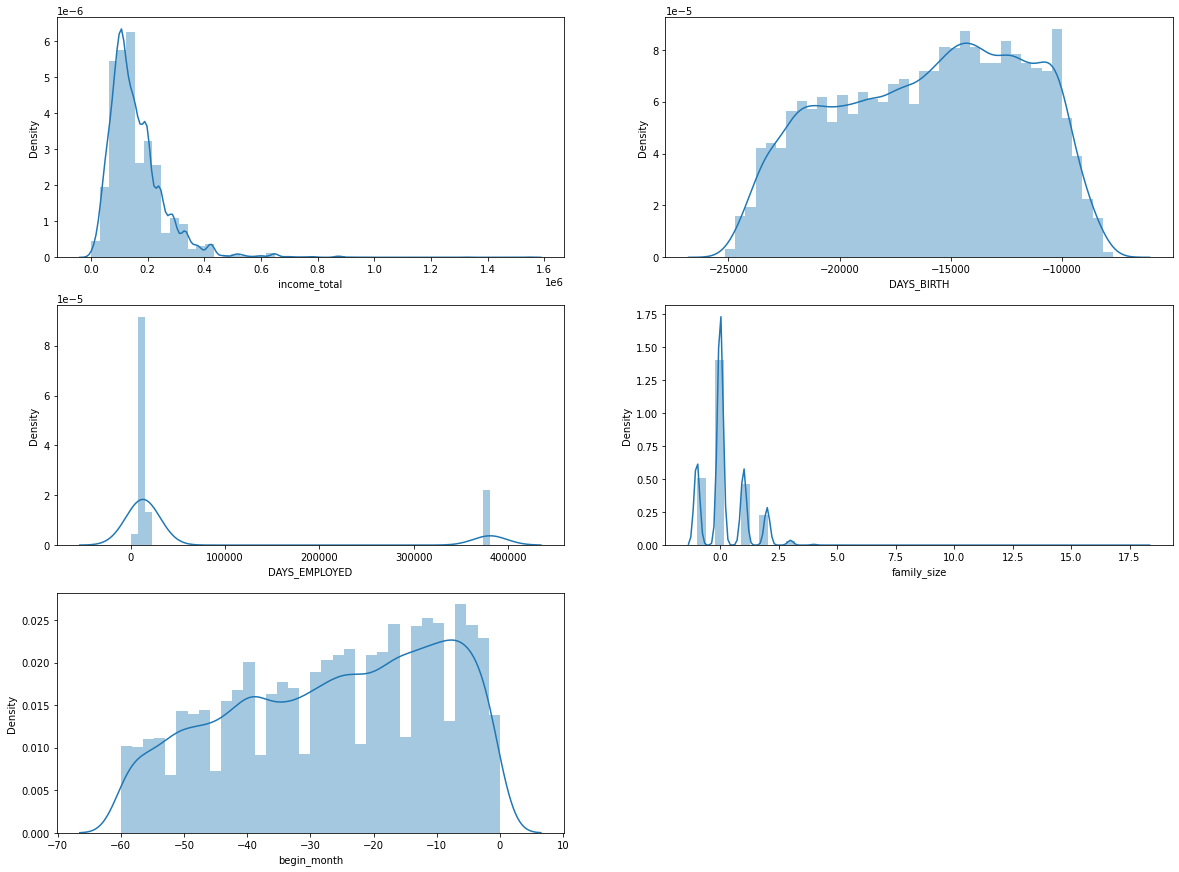

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
for i in range(5):
    plt.subplot(3,2,i+1)
    sns.distplot(train[columns[i]])
plt.show()